In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler
from plotnine import *

# Lettura del DataSet

In [2]:
#path dataset
path = "../DataSet/"

In [13]:
df = pd.read_csv(path + 'DataSet.csv') 

In [14]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1258.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1190.000000,...,1470.000000,753.0,1470.000000,1470.000000,1178.000000,1470.000000,1396.000000,1470.000000,1470.000000,1470.000000
mean,37.115262,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6548.915966,...,2.712245,80.0,0.793878,11.279592,2.810696,2.761224,6.942693,4.229252,2.187755,4.123129
std,9.068654,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4732.775331,...,1.081209,0.0,0.852077,7.780782,1.302499,0.706476,6.033444,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2973.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4907.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8437.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# 3 - DataQuality - Preparation + Missing Values

### Missing Values

In [15]:
print('\n N° null values:')
print(df.isna().sum())


 N° null values:
Age                         212
Attrition                     0
BusinessTravel              131
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                       75
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               280
MonthlyRate                   0
NumCompaniesWorked            0
Over18                      468
OverTime                      0
PercentSalaryHike             0
PerformanceRating           172
RelationshipSatisfaction      0
StandardHours               717
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear       292
WorkLifeBalance               0
YearsAtCompany               74
YearsInCurrentRole    

# 3.1 - DataQuality - MissingValues

I missing values che mancano sono
- Age                         212
- BusinessTravel              131
- Gender                       75
- MonthlyIncome               280
- PerformanceRating           172
- TrainingTimesLastYear       292
- YearsAtCompany               74
- Over18                      468
- StandardHours               717


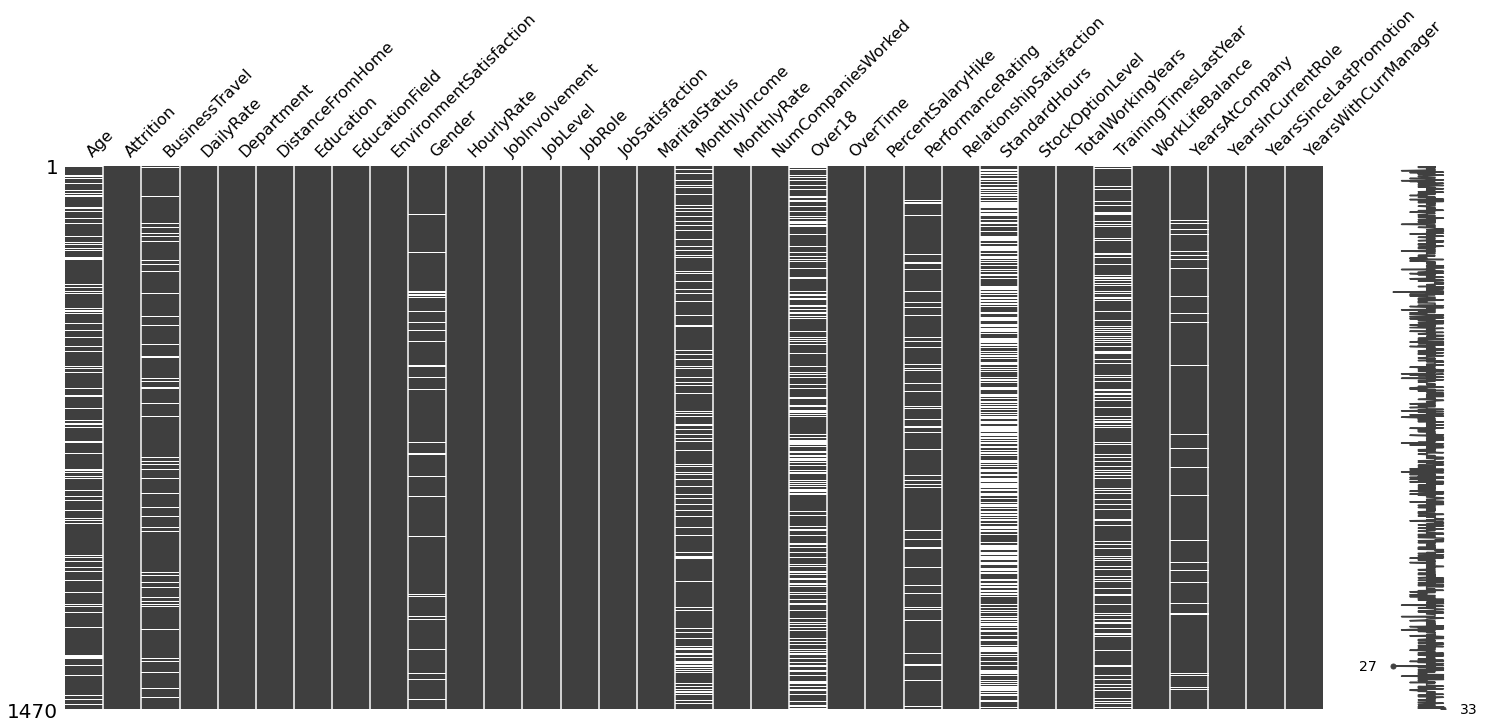

In [16]:
msno.matrix(df)

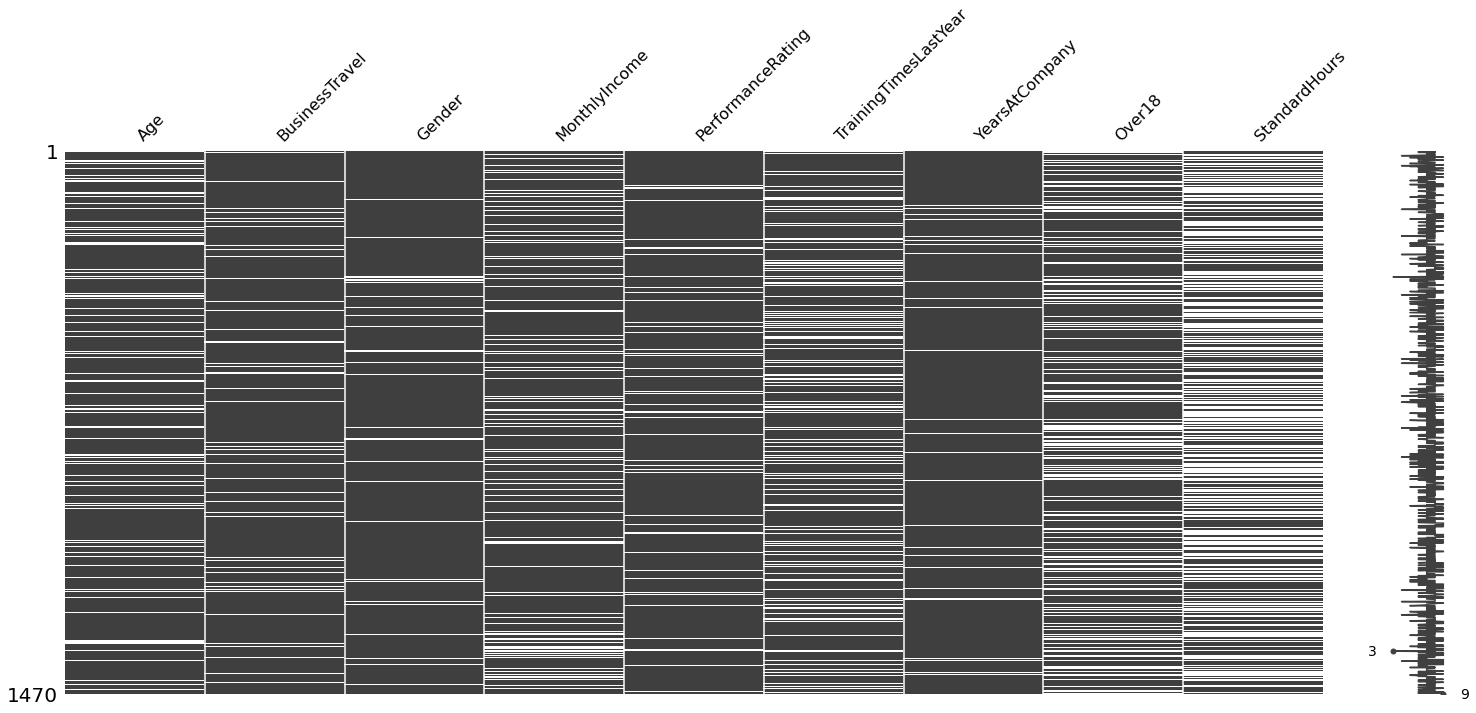

In [17]:
msno.matrix(df[["Age", "BusinessTravel", "Gender", "MonthlyIncome", "PerformanceRating", "TrainingTimesLastYear", "YearsAtCompany", "Over18", "StandardHours"]])

Vediamo attraverso la heatmap di missingno la correlazione di nullità: cioè quanto fortemente la presenza o l'assenza di una variabile influisce sulla presenza di un'altra.

La correlazione di nullità varia da:
- -1(se una variabile appare, l'altra sicuramente no) 
- a 0 (le variabili che appaiono o non appaiono non hanno alcun effetto l'una sull'altra) 
- a 1(se una variabile appare anche l'altra lo fa sicuramente).

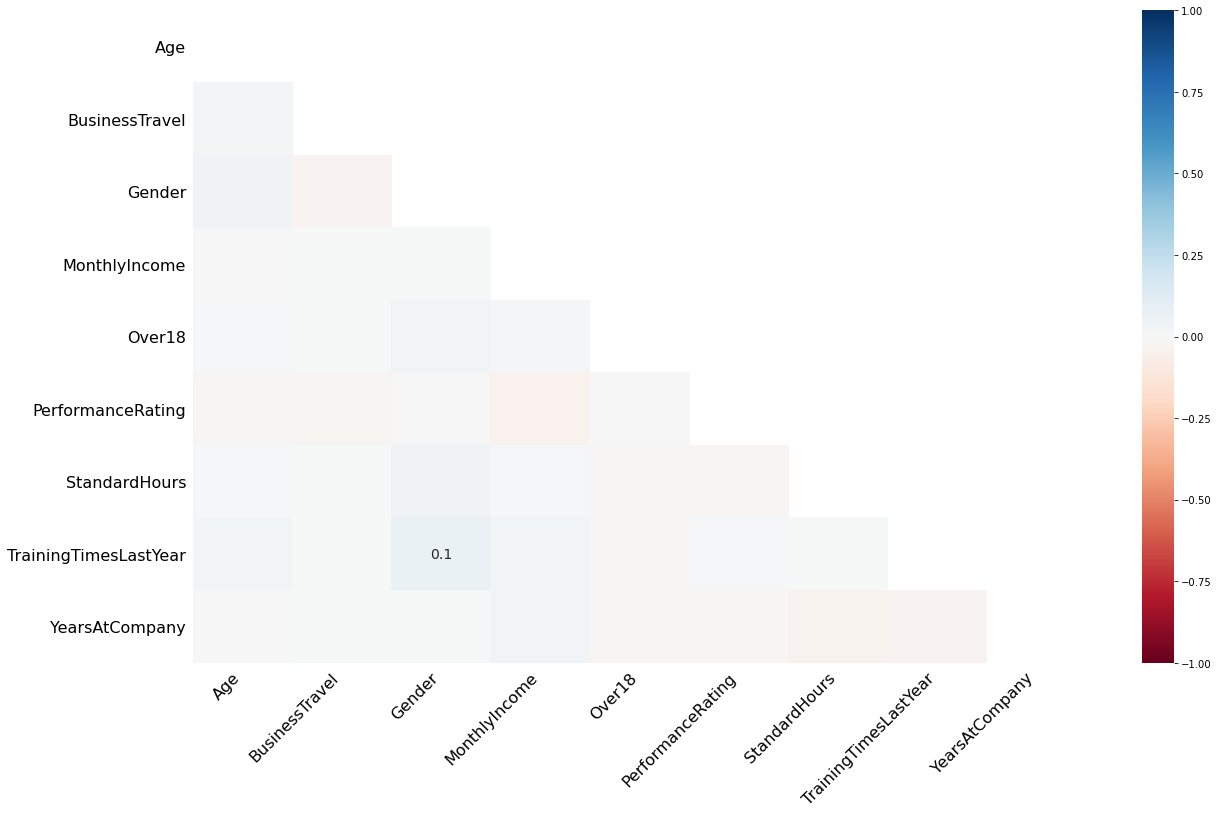

In [7]:
msno.heatmap(df)

La Heatmap mostra una leggere correlazione positiva tra Gender e TrainingTimesLastYear, che però potrebbe essere
banale considerando il numero di valori mancanti non del tutto equilibrati (292 vs 75)

In [8]:
ls = df[["Age", "BusinessTravel", "Gender", "MonthlyIncome", 
         "PerformanceRating", "TrainingTimesLastYear", "YearsAtCompany", "Over18", "StandardHours"]]

In [9]:
select_df = ls[pd.isna(ls['Age']) |
                  pd.isna(ls['BusinessTravel']) |
                   pd.isna(ls['Gender']) |
                   pd.isna(ls['MonthlyIncome']) |
                   pd.isna(ls['PerformanceRating']) |
                   pd.isna(ls['TrainingTimesLastYear']) |
                   pd.isna(ls['Over18']) |
                   pd.isna(ls['StandardHours']) |               
                   pd.isna(ls['YearsAtCompany'])
                  ]
select_df["CountNull"] = ls.isnull().sum(axis=1)

<ipython-input-9-3a92e26f0bfa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_df["CountNull"] = ls.isnull().sum(axis=1)


In [10]:
select_df

,Age,BusinessTravel,Gender,MonthlyIncome,PerformanceRating,TrainingTimesLastYear,YearsAtCompany,Over18,StandardHours,CountNull
0,52.0,Travel_Rarely,Male,8446.0,3.0,2.0,8.0,NaN,80.0,1
1,36.0,Travel_Rarely,Male,4834.0,3.0,3.0,1.0,NaN,80.0,1
2,NaN,Travel_Frequently,NaN,4768.0,3.0,4.0,1.0,Y,NaN,3
3,33.0,Travel_Rarely,Male,2799.0,3.0,1.0,3.0,Y,NaN,1
4,NaN,Travel_Rarely,Female,7978.0,3.0,NaN,10.0,NaN,80.0,3
...,...,...,...,...,...,...,...,...,...,...
1463,34.0,Travel_Rarely,Female,3294.0,NaN,2.0,5.0,NaN,80.0,2
1464,30.0,NaN,Male,3072.0,3.0,4.0,12.0,NaN,NaN,3
1465,38.0,Travel_Rarely,Male,8740.0,3.0,NaN,8.0,Y,NaN,2
1466,44.0,NaN,Male,6465.0,NaN,5.0,4.0,Y,NaN,3


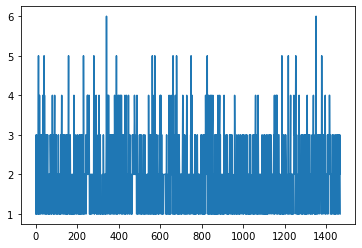

In [11]:
select_df["CountNull"].plot()

Vediamo quali righe hanno missing values

In [12]:
idx = 0
null_l = []
maxc = 0
for e in ls.values:
    tmp = []
    count = 0
    for val in e:
        if(pd.isna(val)):
            tmp.append(1)
            count = count + 1
        else:
            tmp.append(0)
    tmp.append(idx)
    if(count >0):
        null_l.append((tmp, count))
        if(count > maxc):
            maxc = count
    idx = idx+1
print("Max missing values per row: " + str(maxc))

Max missing values per row: 6


In [13]:
null_l

[([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 1),
 ([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], 1),
 ([1, 0, 1, 0, 0, 0, 0, 0, 1, 2], 3),
 ([0, 0, 0, 0, 0, 0, 0, 0, 1, 3], 1),
 ([1, 0, 0, 0, 0, 1, 0, 1, 0, 4], 3),
 ([0, 0, 0, 0, 0, 0, 0, 0, 1, 5], 1),
 ([0, 1, 0, 0, 0, 0, 0, 1, 0, 6], 2),
 ([0, 1, 0, 0, 0, 0, 0, 0, 1, 7], 2),
 ([0, 0, 1, 0, 0, 0, 0, 0, 1, 8], 2),
 ([0, 0, 0, 0, 0, 1, 0, 0, 0, 9], 1),
 ([0, 0, 0, 0, 0, 0, 0, 1, 0, 10], 1),
 ([1, 0, 0, 0, 0, 0, 0, 0, 0, 11], 1),
 ([0, 0, 0, 1, 0, 0, 0, 1, 1, 12], 3),
 ([0, 0, 1, 0, 1, 1, 0, 1, 1, 13], 5),
 ([0, 0, 0, 0, 0, 0, 0, 0, 1, 14], 1),
 ([0, 0, 1, 0, 0, 0, 0, 1, 0, 15], 2),
 ([0, 1, 0, 0, 0, 0, 0, 0, 0, 16], 1),
 ([0, 0, 0, 0, 1, 1, 0, 1, 1, 18], 4),
 ([0, 0, 0, 1, 0, 0, 0, 1, 0, 19], 2),
 ([0, 0, 0, 0, 0, 0, 0, 0, 1, 20], 1),
 ([0, 1, 0, 1, 1, 0, 0, 0, 0, 21], 3),
 ([0, 0, 0, 1, 0, 0, 0, 0, 1, 22], 2),
 ([1, 1, 0, 0, 0, 0, 0, 0, 1, 23], 3),
 ([0, 0, 0, 0, 0, 0, 0, 0, 1, 24], 1),
 ([1, 0, 0, 1, 0, 0, 0, 0, 0, 26], 2),
 ([0, 0, 0, 1, 0, 0, 0, 0, 1, 27], 

In [14]:
df_copy = df.copy()

In [15]:
def handling_missing(dataset, dimension, intval):

    if intval:
        tmp_group = dataset.groupby([dataset["Department"],
                             dataset["JobRole"] 
                            #,dataset["WorkLifeBalance"]
                                    ])[dimension]
        tmp_group = tmp_group.apply(lambda x: x.fillna(x.mean()))
        for i in range(0, len(tmp_group)):
            tmp_group[i] = round(tmp_group[i] , 0)
    else:
        tmp_group = dataset.groupby([dataset["Department"],
                                 dataset["JobRole"], 
                                dataset["WorkLifeBalance"]])[dimension]
        tmp_group = tmp_group.apply(lambda x: x.fillna(x.mode()[0]))
    if tmp_group.isna().sum() == 0:
        print("For " + dimension + " all missing values replaced")
        dataset[dimension] = tmp_group
    else:
        print("For " + dimension + " error")

In [16]:
handling_missing(df_copy, "Age", 1)
handling_missing(df_copy, "MonthlyIncome", 1)
handling_missing(df_copy, "PerformanceRating", 0)
handling_missing(df_copy, "TrainingTimesLastYear", 1)
handling_missing(df_copy, "YearsAtCompany", 1)
handling_missing(df_copy, "Gender", 0)
handling_missing(df_copy, "BusinessTravel", 0)

For Age all missing values replaced
For MonthlyIncome all missing values replaced
For PerformanceRating all missing values replaced
For TrainingTimesLastYear all missing values replaced
For YearsAtCompany all missing values replaced
For Gender all missing values replaced
For BusinessTravel all missing values replaced


In [17]:
df_copy.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,753.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,37.110884,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6548.817007,...,2.712245,80.0,0.793878,11.279592,2.847619,2.761224,6.938095,4.229252,2.187755,4.123129
std,8.395796,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4262.634483,...,1.081209,0.0,0.852077,7.780782,1.168531,0.706476,5.881827,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3482.750000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5792.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,7116.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [57]:
df_copy.to_csv(r''+path+'Dataset_withoutMissingV.csv', index = False)

In [19]:
categorical_v = ["Department", "EducationField", "JobRole", "MaritalStatus"]
for i in categorical_v:
    data_crosstab = pd.crosstab(df['BusinessTravel'], 
                            df[i],  
                               margins = False) 
    print(data_crosstab) 
    print("")
    print("")
    
ordinal_v = ["Education", "JobInvolvement", "JobSatisfaction", "PerformanceRating", 
              "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]
for i in ordinal_v:
    data_crosstab = pd.crosstab(df['BusinessTravel'], 
                            df[i],  
                               margins = False) 
    print(data_crosstab) 
    print("")
    print("")

Department         Human Resources  Research & Development  Sales
BusinessTravel                                                   
Non-Travel                       4                      88     46
Travel_Frequently               15                     164     75
Travel_Rarely                   36                     626    285


EducationField     Human Resources  Life Sciences  Marketing  Medical  Other  \
BusinessTravel                                                                 
Non-Travel                       2             64         15       37      9   
Travel_Frequently                4            112         30       77     10   
Travel_Rarely                   17            376        100      313     55   

EducationField     Technical Degree  
BusinessTravel                       
Non-Travel                       11  
Travel_Frequently                21  
Travel_Rarely                    86  


JobRole            Healthcare Representative  Human Resources  \
BusinessTr

# 3.2 - DataQuality - Outlier

In [22]:
numeric = ['Age', 'MonthlyIncome'
       'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel','JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

In [30]:
outlier_columns = ["MonthlyIncome", "Age","NumCompaniesWorked","TrainingTimesLastYear",
                            "TotalWorkingYears", "YearsAtCompany",
                            "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]

[Text(0, 0, '0')]

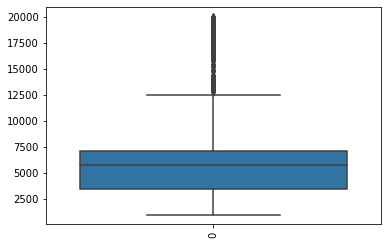

In [27]:
#Guardiamo MonthlyIncome da solo => outliers da 12500
ax = sns.boxplot(data=df_copy[outlier_columns[0]],orient="v" )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, '0')]

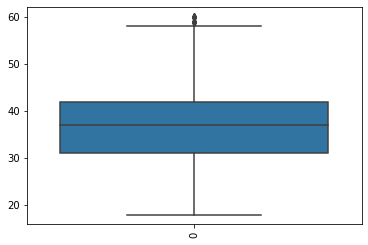

In [28]:
#Guardiamo Age da solo => outliers da 58
ax = sns.boxplot(data=df_copy[outlier_columns[1]],orient="v" )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'NumCompaniesWorked'), Text(0, 0, 'TrainingTimesLastYear')]

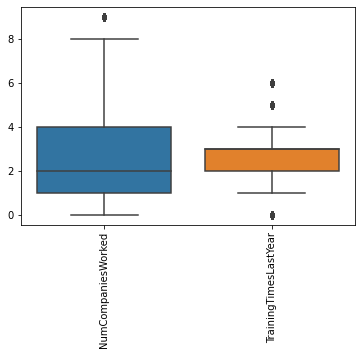

In [31]:
#Plottiamo le fasce di anni "brevi":
# Per NumCompanies outliers a = 9; per trainingTimes outliers a 0, 5, 6
ax = sns.boxplot(data=df_copy[outlier_columns[2:4]],orient="v" )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'TotalWorkingYears'),
 Text(0, 0, 'YearsAtCompany'),
 Text(0, 0, 'YearsInCurrentRole'),
 Text(0, 0, 'YearsSinceLastPromotion'),
 Text(0, 0, 'YearsWithCurrManager')]

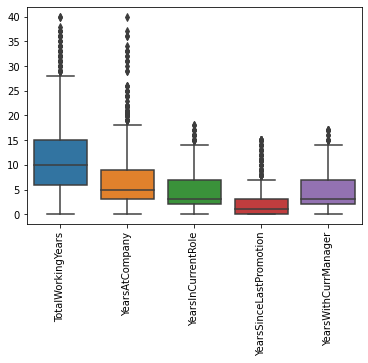

In [32]:
ax = sns.boxplot(data=df_copy[outlier_columns[4:]],orient="v" )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

### Controlliamo eventuali incongruenze dovute agli outliers

In [58]:
df_copy = pd.read_csv(path + 'Dataset_withoutMissingV.csv') 

In [11]:
## Gli outliers per YearsSinceLastPromotion sono i valori con 6, 7
## Tuttavia se questa cosa è maggiore degli anni di lavoro allora è un errore
df_copy[(df_copy["YearsSinceLastPromotion"]>5) & (df_copy["TotalWorkingYears"] < df_copy["YearsSinceLastPromotion"])]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [12]:
## Come sopra ma per YearsWithCurrManager
df_copy[(df_copy["YearsWithCurrManager"]>14) & (df_copy["TotalWorkingYears"] < df_copy["YearsWithCurrManager"])]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [13]:
## Come sopra ma per YearsWithCurrManager
df_copy[(df_copy["YearsInCurrentRole"]>14) & (df_copy["TotalWorkingYears"] < df_copy["YearsInCurrentRole"])]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [56]:
# Controlliamo tre casi:
# 1) Che il numero di anni nella compagnia non superi il numero totale di anni lavorativi
# 2) che il numero di anni di lavoro non superi l'età
# 3) (la 2 è inglobata in questa), che non si abbia lavorato al di sotto dei 16 anni
x = df[
    (df["TotalWorkingYears"] < df["YearsAtCompany"])
        |((df["Age"] - df["TotalWorkingYears"]) < 16)
       ][["Age", "TotalWorkingYears", "YearsAtCompany"]]
x

,Age,TotalWorkingYears,YearsAtCompany
1,36.0,21,1.0
4,37.0,2,10.0
6,27.0,6,9.0
10,20.0,1,2.0
12,52.0,20,34.0
...,...,...,...
1462,27.0,26,7.0
1464,30.0,25,12.0
1465,38.0,2,8.0
1468,36.0,4,8.0


#### Creiamo vari dataframe per usarli come prove, in cui eliminiamo gli outliers:

In [16]:
# 1) Eliminiamo i record che non rispettano le tre condizioni precedenti
df_drop_A_Caso = df_copy.copy()
df_drop_A_Caso = df_drop_A_Caso.drop(index = x.index)
df_drop_A_Caso.to_csv(r''+path+'Dataset_withoutError.csv', index = False)

In [29]:
# 2) Eliminiamo solo gli outliers relativi ad anni
df_drop_A_Caso = df_copy.copy()
y = df_drop_A_Caso[(df_drop_A_Caso["TotalWorkingYears"]>28) |(df_drop_A_Caso["YearsAtCompany"]>17)
                           |(df_drop_A_Caso["YearsInCurrentRole"]>14) |(df_drop_A_Caso["YearsSinceLastPromotion"]>7)
                           |(df_drop_A_Caso["YearsWithCurrManager"]>14)]
df_drop_A_Caso = df_drop_A_Caso.drop(index = y.index)
df_drop_A_Caso.to_csv(r''+path+'Dataset_withoutYearOutlier.csv', index = False)

In [18]:
# 3) Eliminiamo gli outliers relativi a NumCompaniesWorked e TrainingTimesLastYear
df_drop_A_Caso = df_copy.copy()
z = df_drop_A_Caso[(df_drop_A_Caso["NumCompaniesWorked"]>8) |(df_drop_A_Caso["TrainingTimesLastYear"]==0)
                           |(df_drop_A_Caso["TrainingTimesLastYear"]>4)]
df_drop_A_Caso = df_drop_A_Caso.drop(index = z.index)
df_drop_A_Caso.to_csv(r''+path+'Dataset_withoutCompanyOutlier.csv', index = False)

In [19]:
# 4) Eliminiamo gli outliers relativi a MonthlyIncome
df_drop_A_Caso = df_copy.copy()
t = df_drop_A_Caso[(df_drop_A_Caso["MonthlyIncome"]>12500)]
df_drop_A_Caso = df_drop_A_Caso.drop(index = t.index)
df_drop_A_Caso.to_csv(r''+path+'Dataset_withoutMonthlyOutlier.csv', index = False)

### Aggiungiamo al dataset una colonna "isValid" che indica se il record appartiene o meno ai record "Errati"

In [59]:
isValid =[]
for i in range(df.shape[0]):
    if i in x.index:
        isValid.append("True")
    else:
        isValid.append("False")

In [60]:
df_copy["NotValid"] = isValid

In [61]:
df_copy.to_csv(r''+path+'Dataset_Final.csv', index = False)

In [73]:
df_scaler = RobustScaler().fit_transform(df_copy[outlier_columns].values)
df_4_scaler = df_copy.copy()
df_4_scaler[outlier_columns] = df_scaler

[Text(0, 0, 'MonthlyIncome'),
 Text(0, 0, 'Age'),
 Text(0, 0, 'NumCompaniesWorked'),
 Text(0, 0, 'TrainingTimesLastYear'),
 Text(0, 0, 'TotalWorkingYears'),
 Text(0, 0, 'YearsAtCompany'),
 Text(0, 0, 'YearsInCurrentRole'),
 Text(0, 0, 'YearsSinceLastPromotion'),
 Text(0, 0, 'YearsWithCurrManager')]

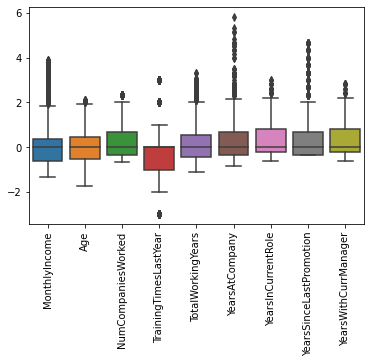

In [75]:
ax = sns.boxplot(data=df_4_scaler[outlier_columns],orient="v" )
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [76]:
def check_IQR(dataset, dimension):
    Q1=dataset[dimension].quantile(0.25)
    Q3=dataset[dimension].quantile(0.75)
    IQR=Q3-Q1
    print("For "+ dimension)
    print(" - Q1 = " + str(Q1))
    print(" - Q3 = " + str(Q3))
    print(" - IQR = " + str(IQR))
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    print("LowerW = " + str(Lower_Whisker) + " - UpperW = " + str(Upper_Whisker))
    return Upper_Whisker
ll = []
for i in outlier_columns:
    ll.append(check_IQR(df_copy, i))

For MonthlyIncome
 - Q1 = 3482.75
 - Q3 = 7116.0
 - IQR = 3633.25
LowerW = -1967.125 - UpperW = 12565.875
For Age
 - Q1 = 31.0
 - Q3 = 42.0
 - IQR = 11.0
LowerW = 14.5 - UpperW = 58.5
For NumCompaniesWorked
 - Q1 = 1.0
 - Q3 = 4.0
 - IQR = 3.0
LowerW = -3.5 - UpperW = 8.5
For TrainingTimesLastYear
 - Q1 = 2.0
 - Q3 = 3.0
 - IQR = 1.0
LowerW = 0.5 - UpperW = 4.5
For TotalWorkingYears
 - Q1 = 6.0
 - Q3 = 15.0
 - IQR = 9.0
LowerW = -7.5 - UpperW = 28.5
For YearsAtCompany
 - Q1 = 3.0
 - Q3 = 9.0
 - IQR = 6.0
LowerW = -6.0 - UpperW = 18.0
For YearsInCurrentRole
 - Q1 = 2.0
 - Q3 = 7.0
 - IQR = 5.0
LowerW = -5.5 - UpperW = 14.5
For YearsSinceLastPromotion
 - Q1 = 0.0
 - Q3 = 3.0
 - IQR = 3.0
LowerW = -4.5 - UpperW = 7.5
For YearsWithCurrManager
 - Q1 = 2.0
 - Q3 = 7.0
 - IQR = 5.0
LowerW = -5.5 - UpperW = 14.5


In [ ]:
# 5) Eliminazione di tutti gli outliers sopra una certa soglia

In [53]:
# 1) Eliminiamo i record che non rispettano le tre condizioni precedenti
df_drop_A_Caso = df_drop_A_Caso.drop(index = x.index)
df_drop_A_Caso.to_csv(r''+path+'Dataset_withoutError.csv', index = False)

In [43]:
# 2) Eliminiamo solo gli outliers relativi ad anni
df_drop_Outliers = df_copy.copy()
y = df_drop_Outliers[
    (df_drop_Outliers["TotalWorkingYears"]>35) 
    |(df_drop_Outliers["YearsAtCompany"]>28)
    |(df_drop_Outliers["YearsInCurrentRole"]>15) 
    |(df_drop_Outliers["YearsSinceLastPromotion"]>8)
    |(df_drop_Outliers["YearsWithCurrManager"]>15)
    |(df_drop_Outliers["NumCompaniesWorked"]>8)
    |(df_drop_Outliers["TrainingTimesLastYear"]==0)
    |(df_drop_Outliers["TrainingTimesLastYear"]>4)
    |(df_drop_Outliers["MonthlyIncome"]>17500)
    ]
df_drop_Outliers = df_drop_Outliers.drop(index = y.index)
df_drop_Outliers = df_drop_Outliers.drop(columns = ["NotValid"])
print(df_drop_Outliers.shape)
df_drop_Outliers.to_csv(r''+path+'Dataset_without_Outlier.csv', index = False)

(1078, 33)


In [56]:
# 3) Eliminiamo gli outliers relativi a NumCompaniesWorked e TrainingTimesLastYear
df_drop_A_Caso = df_copy.copy()
z = df_drop_A_Caso[(df_drop_A_Caso["NumCompaniesWorked"]>8) |(df_drop_A_Caso["TrainingTimesLastYear"]==0)
                           |(df_drop_A_Caso["TrainingTimesLastYear"]>4)]
df_drop_A_Caso = df_drop_A_Caso.drop(index = z.index)
df_drop_A_Caso.to_csv(r''+path+'Dataset_withoutCompanyOutlier.csv', index = False)

In [57]:
# 4) Eliminiamo gli outliers relativi a MonthlyIncome
df_drop_A_Caso = df_copy.copy()
t = df_drop_A_Caso[(df_drop_A_Caso["MonthlyIncome"]>12500)]
df_drop_A_Caso = df_drop_A_Caso.drop(index = t.index)
df_drop_A_Caso.to_csv(r''+path+'Dataset_withoutMonthlyOutlier.csv', index = False)

# 4 - Correlazione Tra Attributi

Calcoliamo la matrice di correlazione con df.corr

Ricordiamo che df non considera dati non-numerici, nel calcolo, cioè:
- 'Attrition', 
- 'BusinessTravel', 
- 'Department', 
- 'EducationField', 
- 'Gender', 
- 'JobRole', 
- 'MaritalStatus',
- 'OverTime', 
- 'StandardHours',

In [97]:
df_final = pd.read_csv(path + 'Dataset_Final.csv') 
df_w_Outlier = pd.read_csv(path + 'Dataset_without_Outlier.csv')
df_original = pd.read_csv(path + 'Dataset.csv')

Eliminiamo gli attributi con un unico valore distinto Over18 ed StandardHours

In [98]:
df_final = df_final.drop(columns = ["Over18", "StandardHours"])
df_final.to_csv(r''+path+'Dataset_Final.csv', index = False)
df_w_Outlier = df_w_Outlier.drop(columns = ["Over18", "StandardHours"])
df_w_Outlier.to_csv(r''+path+'Dataset_without_Outlier.csv', index = False)
df_original = df_original.drop(columns = ["Over18", "StandardHours"])
df_original.to_csv(r''+path+'Dataset.csv', index = False)

In [109]:
def corr_plot(dataset):
    #Attributi con correlazione > 30
    col = ["Age", "MonthlyIncome", "TotalWorkingYears", "JobLevel", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
    fig, ax = plt.subplots(figsize=(15, 15))
    # plot heatmap
    matrix = np.triu(dataset[col].corr())
    sns.heatmap(dataset[col].corr(),annot=True, fmt=".2f", cmap='Blues',
               vmin=-1, vmax=1, cbar_kws={"shrink": .8}, mask=matrix)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    plt.show()    

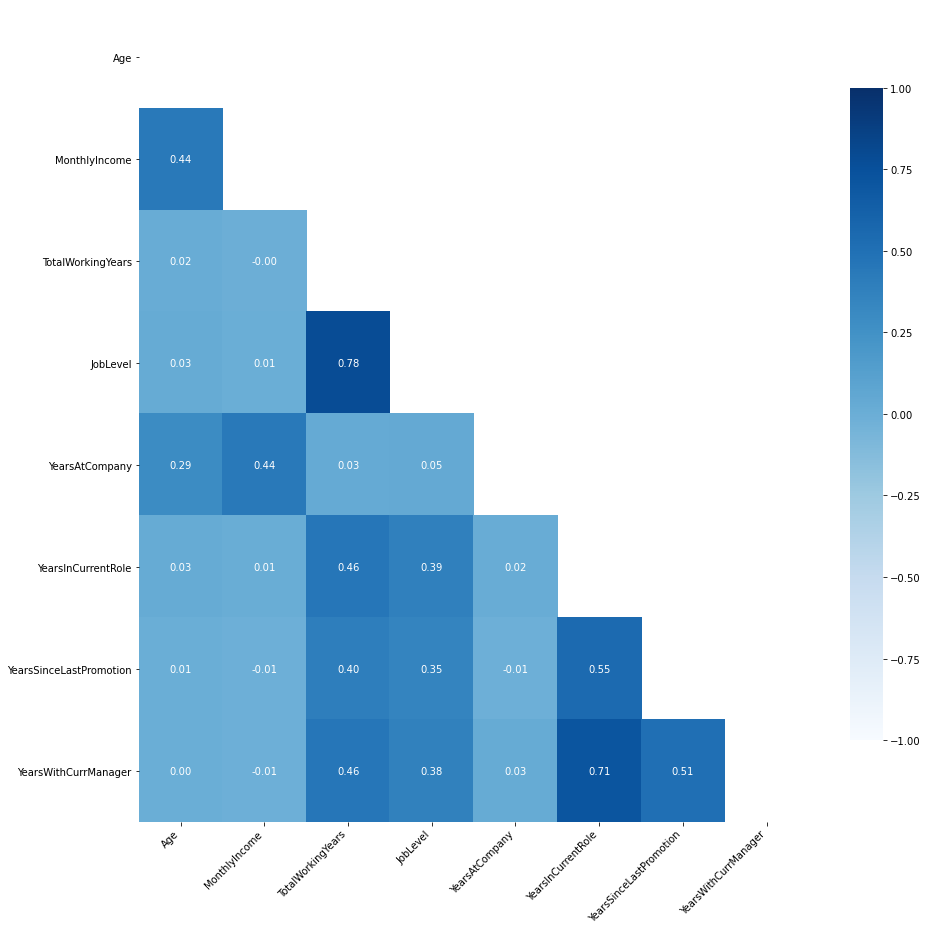

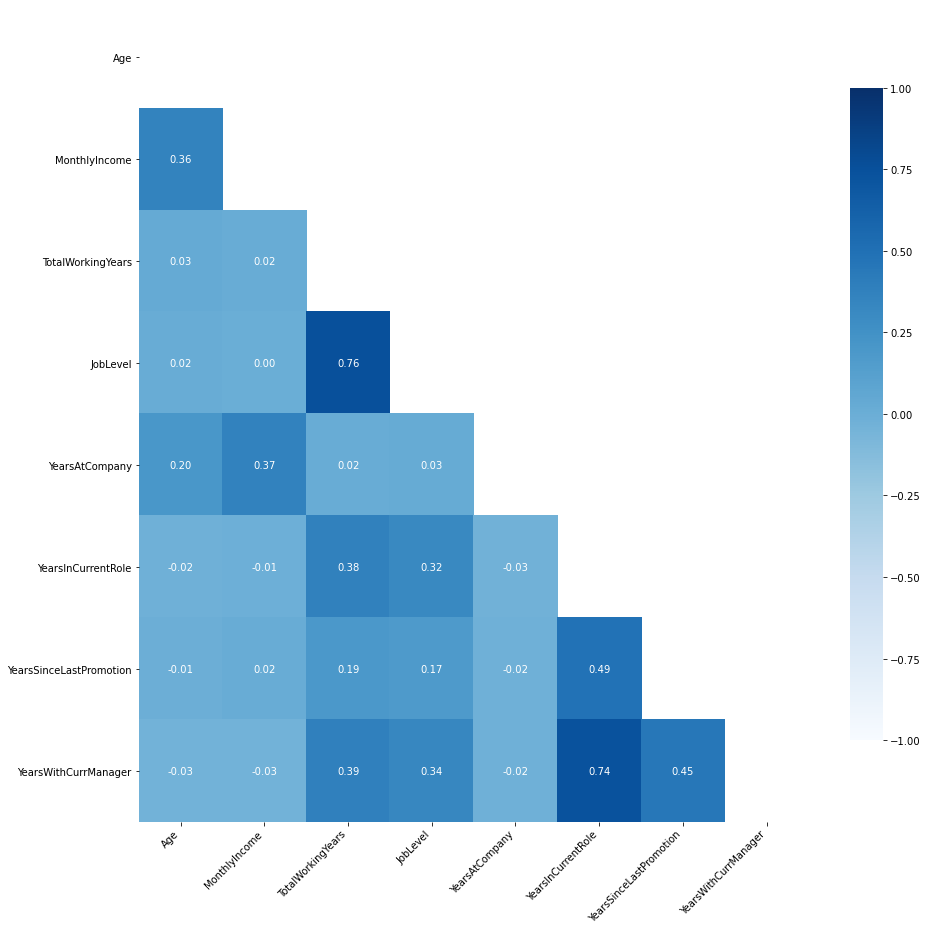

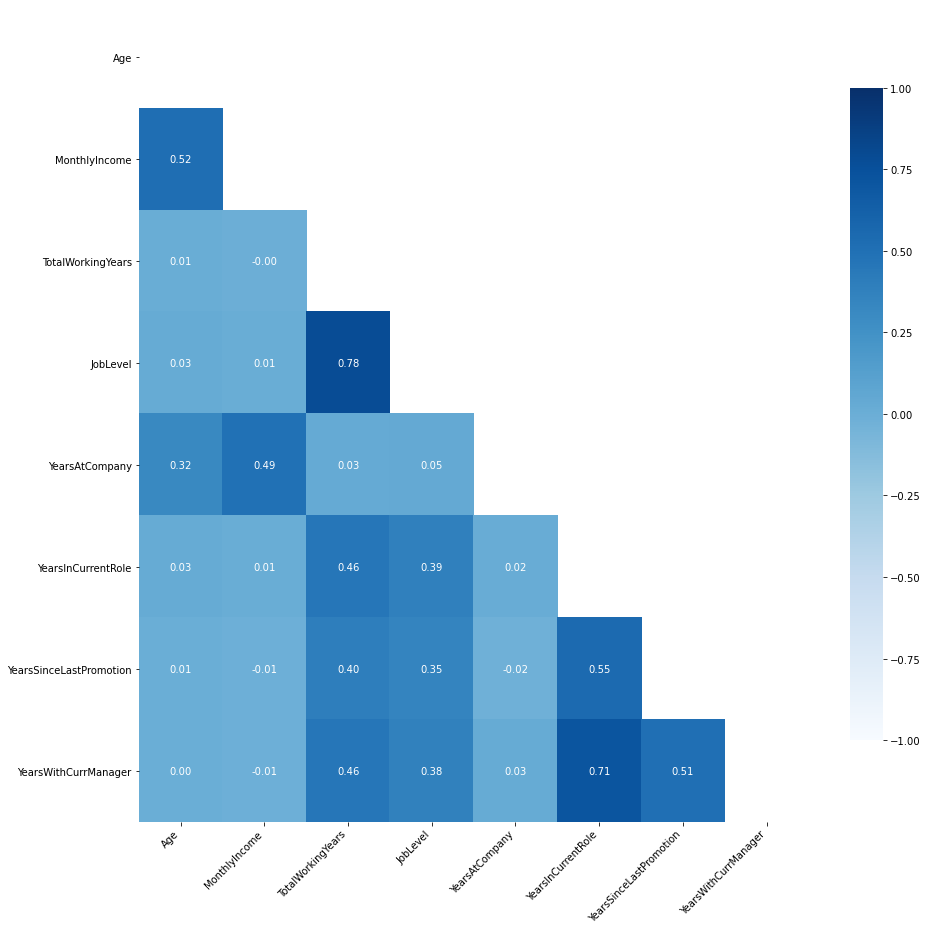

In [110]:
corr_plot(df_final.drop(columns="NotValid"))
corr_plot(df_w_Outlier)
corr_plot(df_original)

Principali di "correlazioni" osservate:
- Age con MonthlyIncome = media
- Age con YearsAtCompany = bassa
- JobLevel con YearsInCurrentRole, LastPromotion, CurrManager = bassa
- JobLevel con MonthlyIncome = Alta
- MonthlyIncome con YearsAtCompany = media
- TotalWorkingYears con YearsInCurrentRole, LastPromotion, CurrManager = media
- YearsSinceLastPromotion con CurrentRole = media
- YearsWithCurrManager con YearsSinceLastPromotion = media
- YearsWithCurrManager con CurrentRole = alta

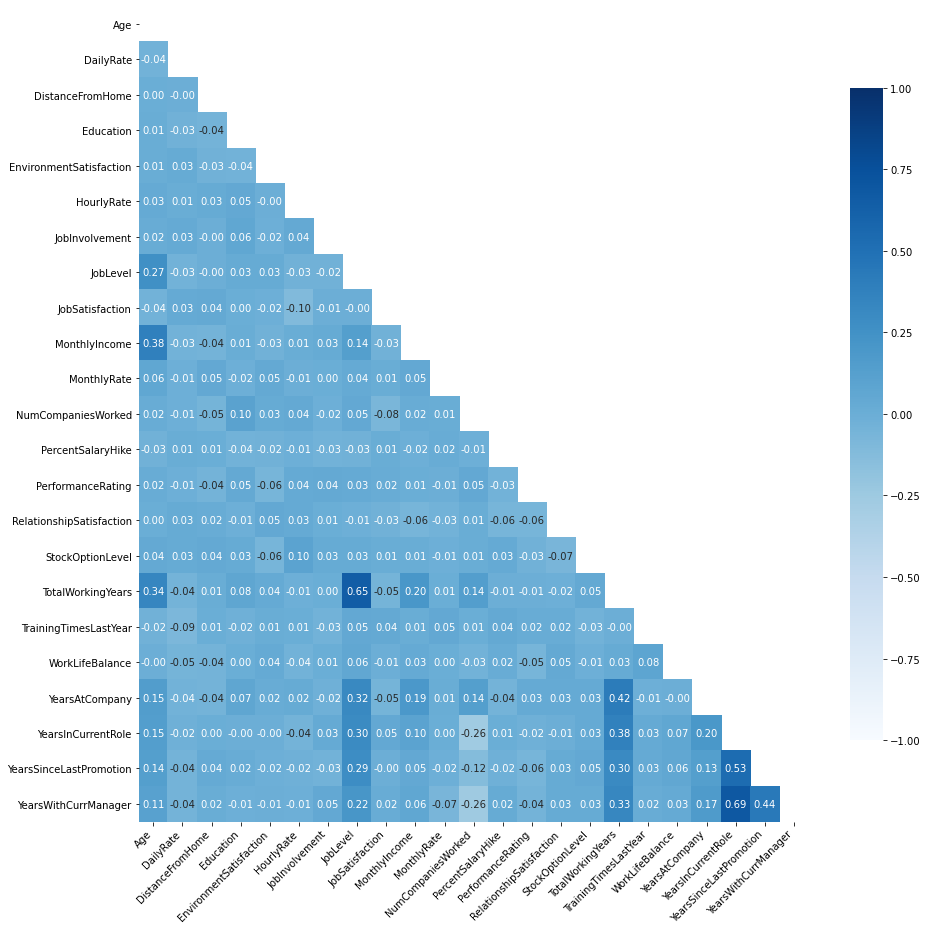

In [85]:
dd = df_final.copy()
dd = dd[dd["NotValid"]==False]
corr_plot(dd.drop(columns=["NotValid"]))

## 3D scatterplot

In [111]:
ls = df_final[["Attrition","MonthlyIncome", "Age", "YearsAtCompany"]]
ls["DimPoint"] = [1 for i in range(len(ls))]

<ipython-input-111-778484d6fa3c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
fig = px.scatter_3d(ls, x='MonthlyIncome', y='Age', z='YearsAtCompany',
              color='Attrition', size="DimPoint"
                   )
fig.show()

# 5 - Data Trasformation

Definiamo TotalSatisfaction come la somma dei 4 indici di soddisfazione:
- EnvironmentSatisfaction, 
- JobInvolvement, 
- JobSatisfaction, 
- RelationshipSatisfaction 

considerando TotalSatisfaction come la soddisfazione Complessiva del dipendente

In [119]:
df_final["TotalSatisfaction"] = df_final["EnvironmentSatisfaction"] + df_final["JobInvolvement"] + df_final["JobSatisfaction"] + df_final["RelationshipSatisfaction"] 

In [120]:
print("Min: " + str(min(df_final["TotalSatisfaction"])) + " Max: " + str(max(df_final["TotalSatisfaction"])))

Min: 5 Max: 16


Definiamo 5 come la soddisfazione più bassa, mentre 16 come la soddisfazione più alta

In [138]:
x = list(set(df_final["TotalSatisfaction"].values))
x

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [147]:
ll = []
for i in x:
    y = len(df_final[(df_final["TotalSatisfaction"] == i) & (df_final["Attrition"] == "Yes")])
    n = len(df_final[(df_final["TotalSatisfaction"] == i) & (df_final["Attrition"] == "No")])
    t = y/(y+n)
    ll.append(t)

([<matplotlib.axis.XTick at 0x18d8098cd90>,
 [Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16')])

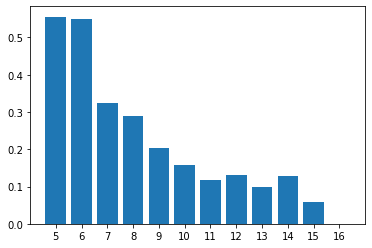

In [157]:
plt.bar(x, ll)
plt.xticks(x, (5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16))

In [165]:
dep = list(set(df_final["Department"]))
avg_dep = {}
for i in dep:
    avg_dep[i] = df_final[df_final["Department"]==i]["MonthlyIncome"].mean()

In [175]:
blIncome = []
for i in df_final[["MonthlyIncome", "PercentSalaryHike", "Department"]].values:
    #i["MonthlyIncome"] < avg_dep[i["Department"]] and i["PercentSalaryHike"] < 15)
    if( i[0] < avg_dep[i[2]] and i[1] < 15):
        blIncome.append(1)
    else:
        blIncome.append(0)

In [178]:
df_final["ProbablyLeave"] = blIncome

In [179]:
df_final.to_csv(r''+path+'Dataset_Final.csv', index = False)